Part of course work Data Analytics for cyber security 

[[1.7]
 [1.5]
 [2.8]
 [5. ]
 [1.3]
 [2.2]
 [1.3]]


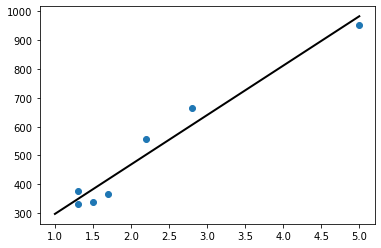

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

x=[1.7,1.5,2.8,5,1.3,2.2,1.3]
y=[368,340,665,954,331,556,376]

from sklearn.linear_model import LinearRegression
X=np.array(x).reshape(len(x),1) # makes this into a matrix for the LinearRegression model

print(X)
# fit the regression model
model = LinearRegression()
model.fit(X, y)

# The -1 means we infer the length of the dimension
X_test=np.array([i/20 for i in range(20,101)]).reshape(-1,1)

y_pred=model.predict(X_test)

plt.scatter(x,y)
plt.plot(X_test, y_pred, color='black', linewidth=2)


<h2>Regression using higher order polynomials</h2>

In [ ]:
import numpy as np

def make_data(N=30, err=0.8, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

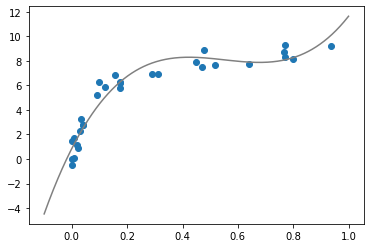

In [ ]:
X, y = make_data()
xfit = np.linspace(-0.1, 1.0, 1000)[:, None]
plt.scatter(X,y)

model3 = PolynomialRegression(3).fit(X,y)
plt.plot(xfit.ravel(),model3.predict(xfit),color='gray')

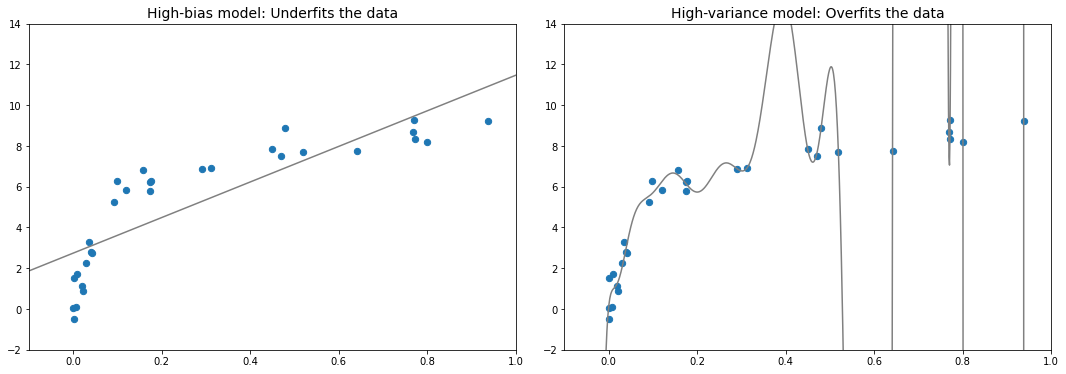

In [ ]:

model1 = PolynomialRegression(1).fit(X, y)
model20 = PolynomialRegression(20).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)

fig.savefig('figures/05.03-bias-variance.png')

<h2>Regression using Gaussian basis</h2>

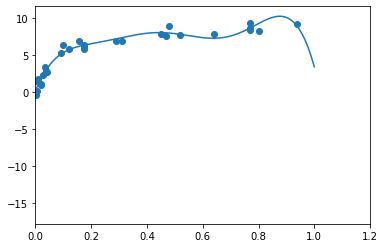

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(5),
                            LinearRegression())
gauss_model.fit(X, y)
yfit = gauss_model.predict(xfit)

plt.scatter(X, y)
plt.plot(xfit, yfit)
plt.xlim(0, 1.2);